In [99]:
from scipy.cluster.hierarchy import linkage
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
import seaborn as sns

%matplotlib inline

In [2]:
iris = load_iris()
data = iris['data']

In [3]:
data[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [11]:
## running ward linkage on our dataset (ward is a method of determining distance between points)

hclusters = linkage(data, 'ward')

In [12]:
hclusters[:5]

array([[  9.00000000e+00,   3.40000000e+01,   0.00000000e+00,
          2.00000000e+00],
       [  3.70000000e+01,   1.50000000e+02,   0.00000000e+00,
          3.00000000e+00],
       [  1.01000000e+02,   1.42000000e+02,   0.00000000e+00,
          2.00000000e+00],
       [  7.00000000e+00,   3.90000000e+01,   1.00000000e-01,
          2.00000000e+00],
       [  0.00000000e+00,   1.70000000e+01,   1.00000000e-01,
          2.00000000e+00]])

In [13]:
## pdist is pairwise distance in n-dimentional space

c, coph_dists = cophenet(hclusters, pdist(data))

In [29]:
## coefficient (higher is probably better)
c

0.87260152506447042

In [26]:
## 
coph_dists[:5]

array([ 3.8758436 ,  3.8758436 ,  3.8758436 ,  0.17320508,  1.29839645])

In [27]:
coph_dists.shape

(11175,)

In [28]:
data.shape

(150, 4)

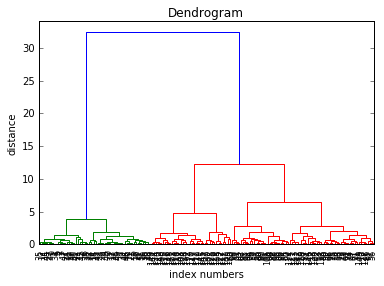

In [39]:
## y axis shows distance among the points
## x axis is all of the index numbers. this one is splitting everything down as far as it goes.

plt.title("Dendrogram")
plt.xlabel("index numbers")
plt.ylabel('distance')
dendrogram(
    hclusters,
    leaf_rotation=90.0,
    leaf_font_size=8.0,
)
plt.show()

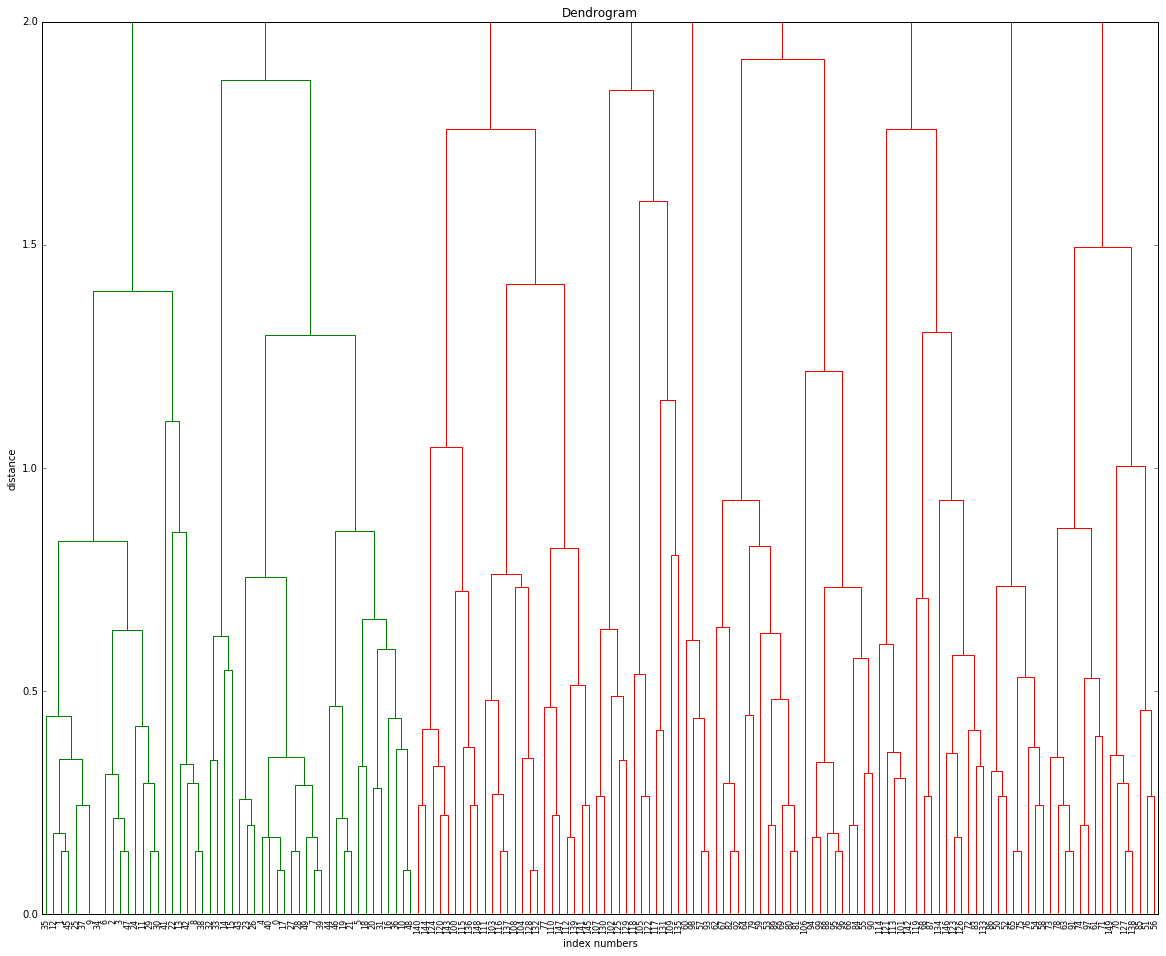

In [40]:
## making it bigger
plt.figure(figsize=(20,16))
plt.title("Dendrogram")
plt.xlabel("index numbers")
plt.ylabel('distance')
dendrogram(
    hclusters,
    leaf_rotation=90.0,
    leaf_font_size=8.0,
)
plt.ylim((0,2))      ## changing how much of the y-axis we see
plt.show()

In [44]:
hclusters[:5]

array([[  9.00000000e+00,   3.40000000e+01,   0.00000000e+00,
          2.00000000e+00],
       [  3.70000000e+01,   1.50000000e+02,   0.00000000e+00,
          3.00000000e+00],
       [  1.01000000e+02,   1.42000000e+02,   0.00000000e+00,
          2.00000000e+00],
       [  7.00000000e+00,   3.90000000e+01,   1.00000000e-01,
          2.00000000e+00],
       [  0.00000000e+00,   1.70000000e+01,   1.00000000e-01,
          2.00000000e+00]])

In [64]:

max_dist=10
clusters = fcluster(hclusters, max_dist, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2,
       3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [47]:
clusters.shape

(150,)

In [55]:
## returns the unique values in clusters
set(clusters)

{1, 2, 3}

In [56]:
# max_dist=3
# clusters = fcluster(hclusters, max_dist, criterion='distance')
# clusters

array([2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1,
       2, 1, 2, 2, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6,
       5, 6, 6, 6, 6, 6, 6, 6, 3, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 5, 3, 6, 4, 3, 3, 4, 5, 4, 3, 4, 3, 3, 3, 6, 6,
       3, 3, 4, 4, 6, 3, 6, 4, 6, 3, 4, 6, 6, 3, 4, 4, 4, 3, 6, 6, 4, 3, 3,
       6, 3, 3, 3, 6, 3, 3, 3, 6, 3, 3, 6], dtype=int32)

In [57]:
set(clusters)

{1, 2, 3, 4, 5, 6}

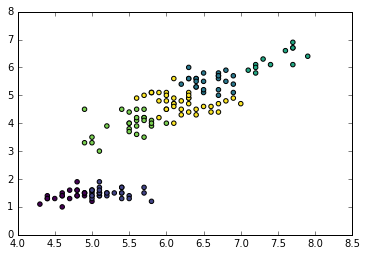

In [63]:
plt.scatter(data[:,0], data[:,2], c=clusters, cmap='viridis')
plt.show()

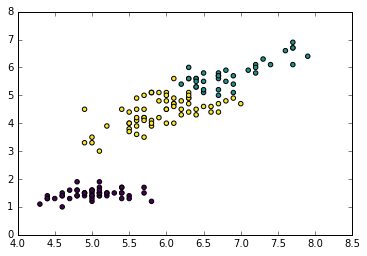

In [66]:
## this one only uses three clusters

plt.scatter(data[:,0], data[:,2], c=clusters, cmap='viridis')
plt.show()

## Clustering with wine dataset

In [69]:
wine = pd.read_csv('~/Datasets/wine_small.csv')

In [70]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [71]:
wine.shape

(1599, 12)

In [74]:
## we should standardize this data because the units and ranges are different

In [77]:
quality = wine['quality']
wine.drop('quality', axis=1, inplace=True)

In [78]:
quality.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [79]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [80]:
wine_standardized = StandardScaler().fit_transform(wine.values)

In [82]:
wine_standardized[:5]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
        -0.58477711],
       [-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611]])

In [83]:
wine_standardized = pd.DataFrame(wine_standardized, columns=[wine.columns])

In [85]:
wine_standardized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [86]:
wine_clusters = linkage(wine_standardized, 'ward')

In [88]:
wine_clusters[0]

array([ 0.,  4.,  0.,  2.])

In [91]:
c, coph_dists = cophenet(wine_clusters, pdist(wine_standardized))

In [92]:
c

0.38577404147427347

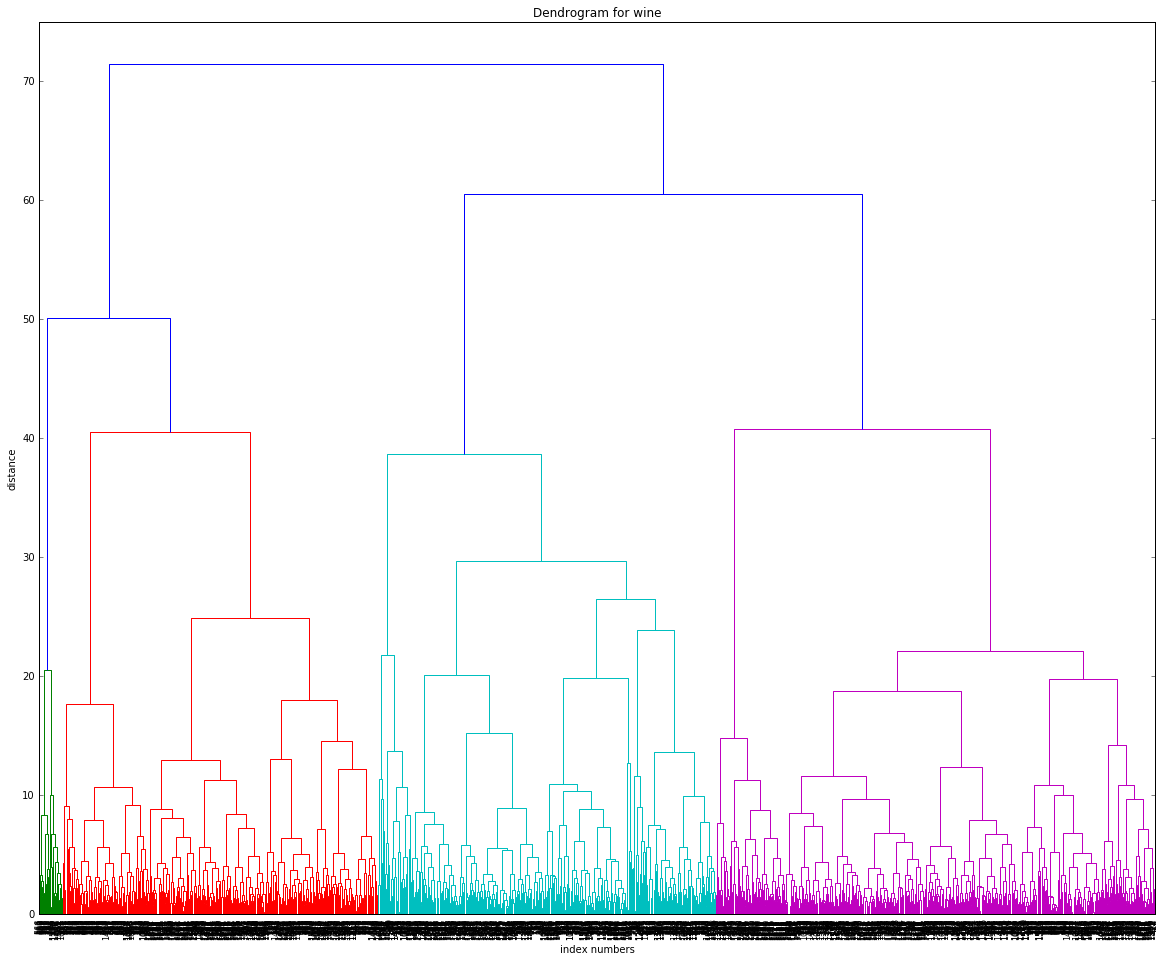

In [93]:
plt.figure(figsize=(20,16))
plt.title("Dendrogram for wine")
plt.xlabel("index numbers")
plt.ylabel('distance')
dendrogram(
    wine_clusters,
    leaf_rotation=90.0,
    leaf_font_size=8.0,
)
# plt.ylim((0,2))      
plt.show()

In [94]:
quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [97]:
## there are six levels of wine quality, so let's try for six clusters
max_dist=39
clusters = fcluster(wine_clusters, max_dist, criterion='distance')
set(clusters)

{1, 2, 3, 4, 5, 6}

In [ ]:
plt.scatter(wine_clusters[:,0], wine_clusters[:,2], c=clusters, cmap='viridis')
plt.show()

In [98]:
wine_standardized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


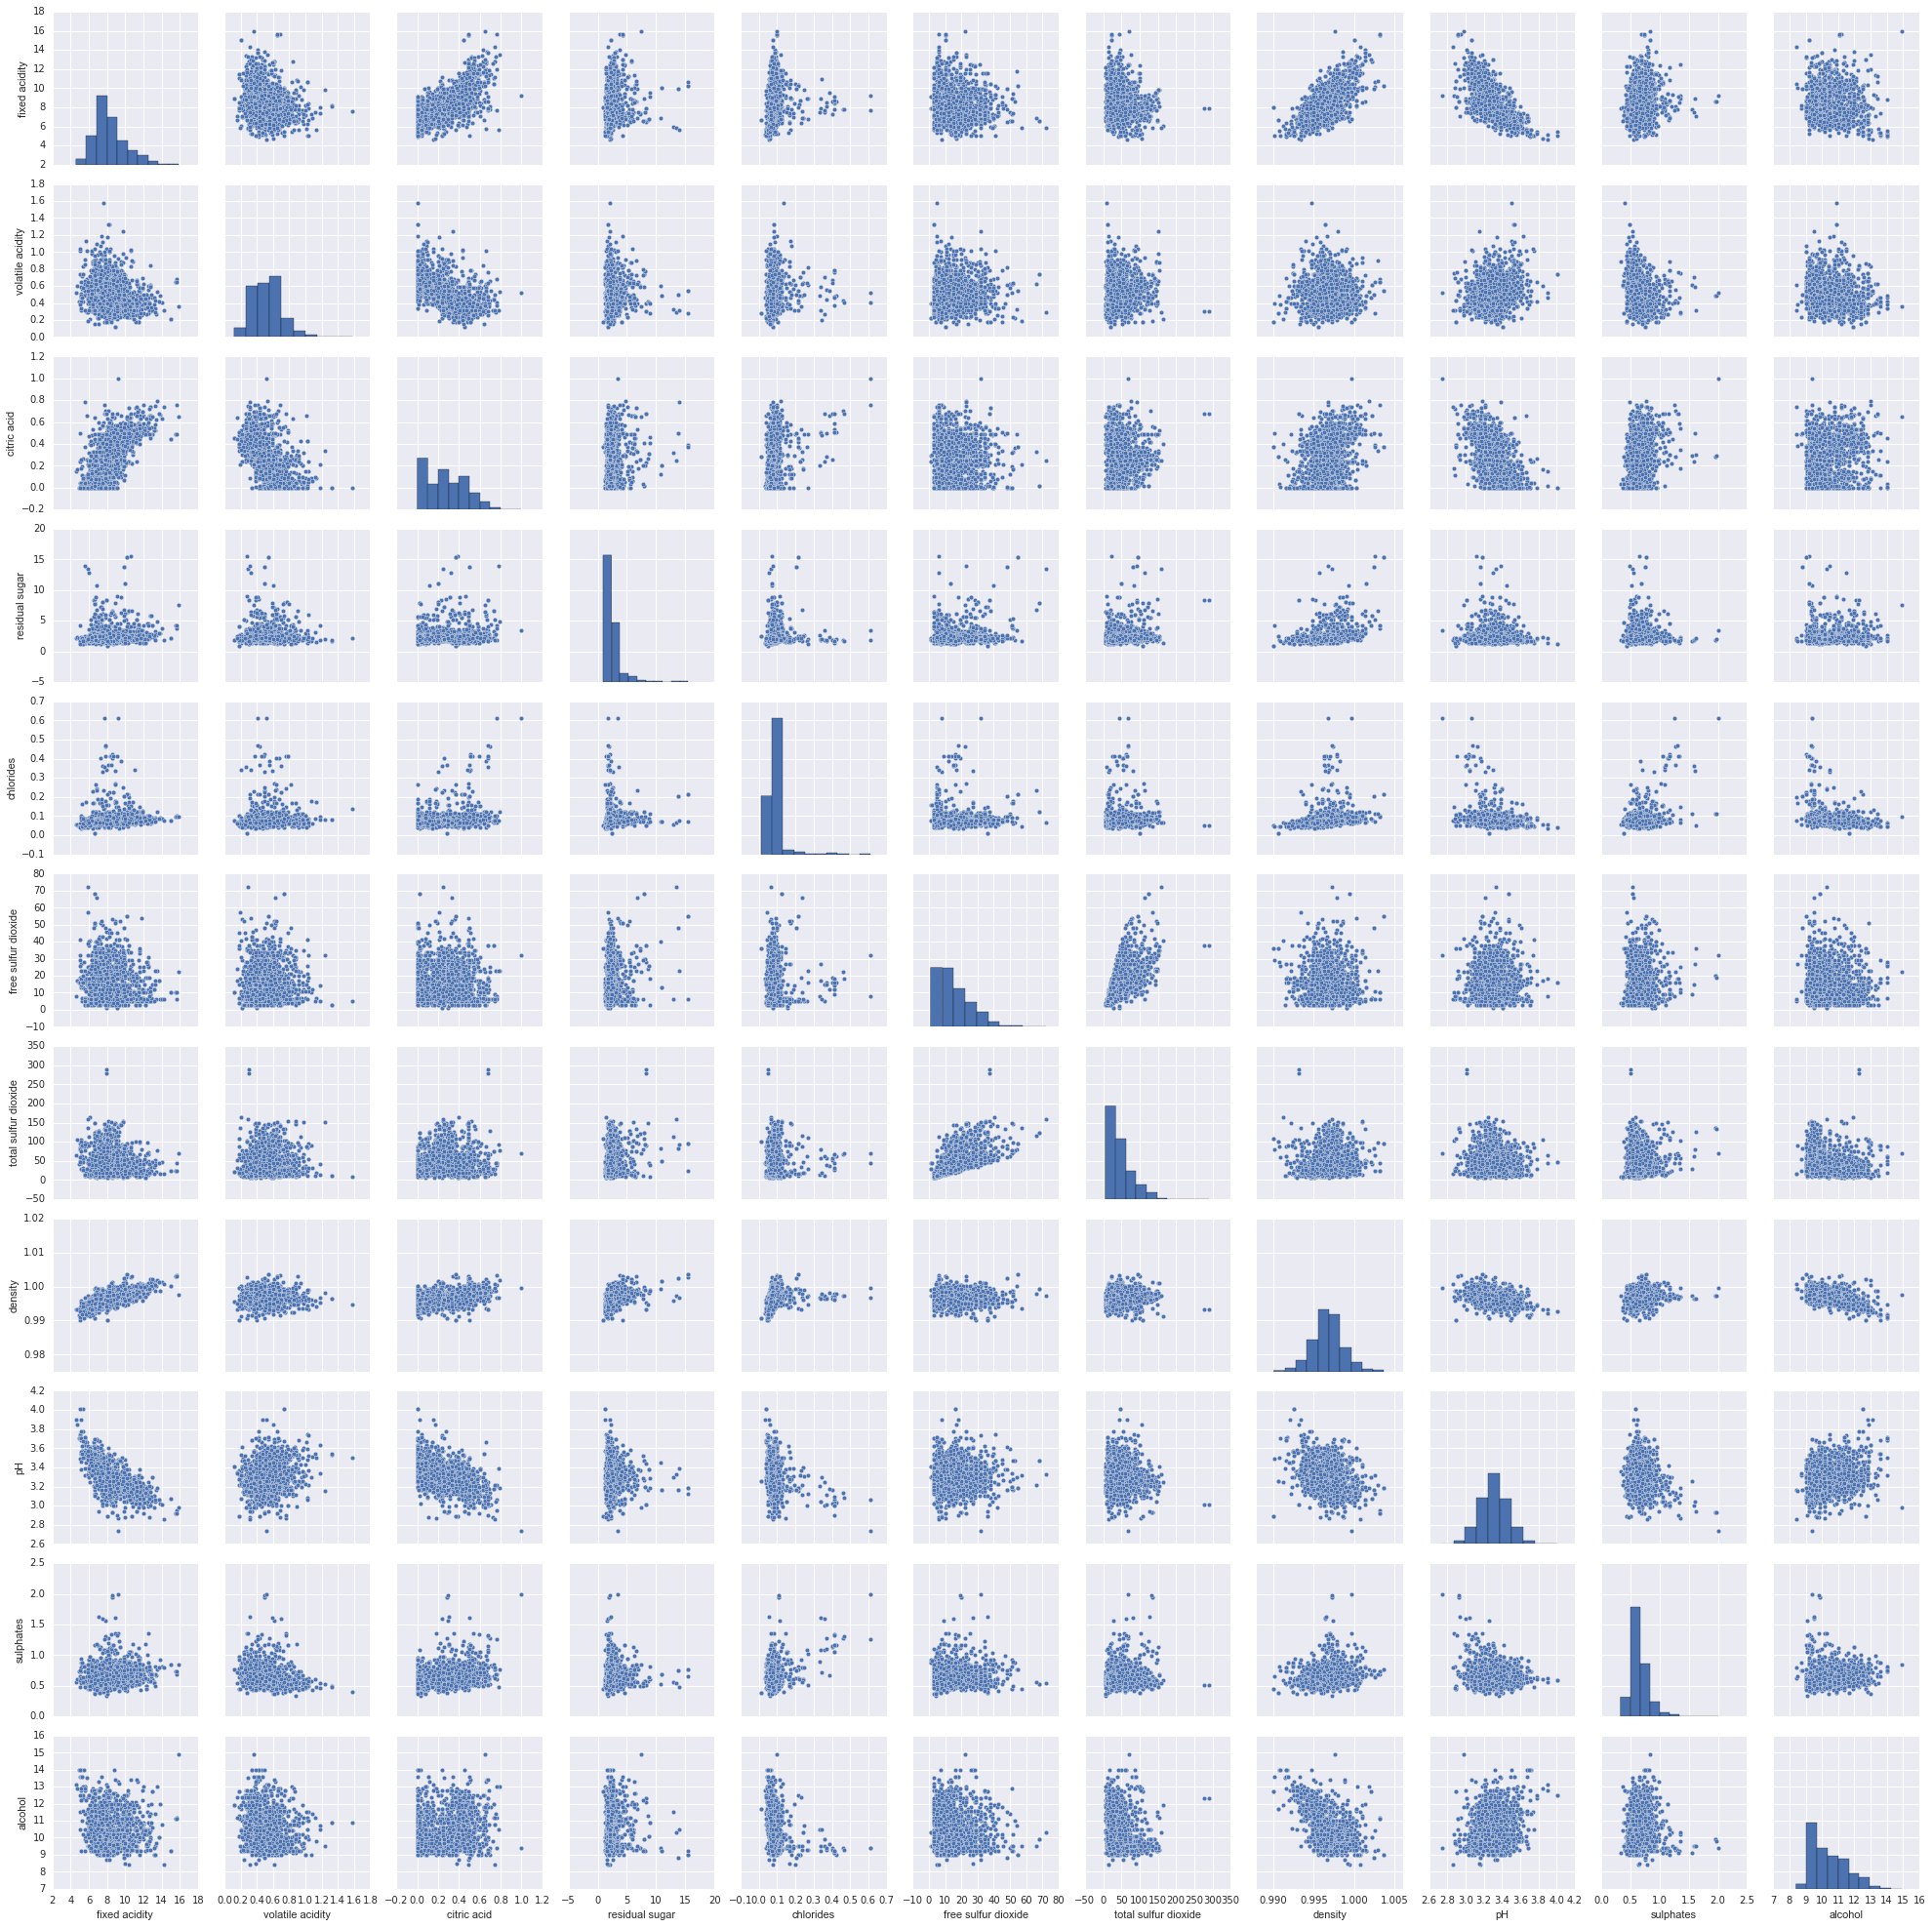

In [100]:
sns.pairplot(wine)

In [101]:
wine_standardized.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol'],
      dtype='object')

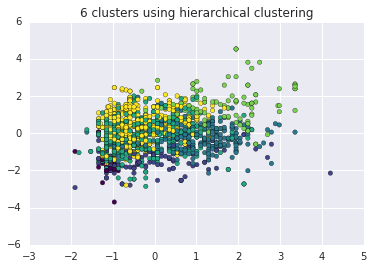

In [103]:
plt.scatter(wine_standardized['alcohol'], wine_standardized['pH'], c=clusters, cmap='viridis')
plt.title('6 clusters using hierarchical clustering')
plt.show()

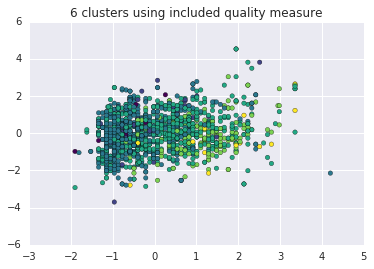

In [108]:
plt.scatter(wine_standardized['alcohol'], wine_standardized['pH'], c=quality, cmap='viridis')
plt.title('6 clusters using included quality measure')
plt.show()

In [111]:
wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [112]:
wine['clusters'] = clusters

In [113]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,clusters
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,6
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,6
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,6
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,4
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,6


In [114]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,clusters
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,-0.562378
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,0.529904
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,-0.748158
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.091859
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.278707
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.045535
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.024665
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.241920
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,0.484933
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,-0.404596


In [116]:
## average alcohol content by cluster
wine.groupby('clusters')['alcohol'].mean()

clusters
1     9.406061
2    10.425333
3    11.197248
4    10.078625
5    12.199158
6     9.991384
Name: alcohol, dtype: float64

In [117]:
wine.groupby('clusters')['pH'].mean()

clusters
1    3.109091
2    3.098640
3    3.274067
4    3.293155
5    3.554646
6    3.367604
Name: pH, dtype: float64

In [118]:
wine['pH'].describe()

count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64